## Introduction

This case study simulates a situation in which a company, after releasing a new line of products, has employed three different sales strategies. Now, six weeks after the release, the sales team wants to know which strategies were efficient, and which were not. They have to report to the executive team in a month.

The three strategies demand different levels of effort from the sales representatives. The first one, merely sending an email, represents no effort whatsoever, since it is a task that can be automated. The second one, simply calling the clients, demands the most effort, since every call lasts 30 minutes on average. The last strategy, calling the clients one week after they have received an email, falls in between the first two, with calls lasting, on average, only 10 minutes.

## Data validation  
  
The dataset contained 15000 rows and 8 columns. After data validation, there remained 14998 rows and 8 columns. Validation for each column was performed as follows:

**Week:** No missing values. Values range from 1 to 6, which is consistent with the situation presented. Int64 data type was changed to categorical.  
  
**Sales method:** No missing values. There were 5 possible unique values when there should have been only 3. "em + call" values were changed to "Email + Call" and "email" was change to "Email". The column now has only 3 unique values, as expected. Object data type was changed to categorical for memory efficiency.  
  
**Customer ID:** There were 15000 unique values, as expected. No changes were made to this column.  
  
**Number of new products sold:** No missing values. There are 10 possible values ranging from 7 to 16. Int64 data type was changed to uint8 for memory efficiency.  
  
**Revenue:** There were 1074 missing values, which represented aproximately 8% of data. Data seemed to be missing completely at random. Since 8% is not a negligeable number, I have searched for ways to impute data. There are strong correlations between number of new products sold and revenue and between sales method and revenue. There is moderate correlation between week and revenue. I have tried grouping the data by the attributes mentioned above to try and find ways of imputing data. In most of them the revenue was not normally distributed, so imputing by mean wasn't the best option. Also, in most of them, revenue was distributed in clusters (probably due to type of product sold, on which I had no information), so imputing by the mode also wasn't a good option. My choice, then, was to perform a random sample imputation, stratifying the data by sales method and number of product solds, which had the highest correlation with revenue. Data type was changed from float64 to float32 for memory efficiency; there were two decimal places, as expected.  
  
**Years as customer:** No missing values. The values ranged from 0 to 63, which is not coherent, since the company was founded in 1984. There were only two rows where number of years exceeded the company's age (39 years): they were both removed from the dataset. Int64 data type was changed to uint8 for memory efficiency.
  
**Number of site visits:** No missing values. Values range from 12 to 41. Int64 data type was changed to uint8 for memory efficiency.
  
**State:** No missing values. There were 50 unique values, comprising all US states. Object data type was changed to categorical for memory efficiency.

## Exploratory Analysis

After validating the data, I have conducted some exploratory analysis in order to answer the questions made by the sales department and to extract other possible insights from it. The analysis is presented below along with the visualizations that support the conclusions.

### Number of Customers and Revenue by Sales Method  
  
![Number of Customers and Revenue by Sales Method](Number%20of%20Customers%20and%20Revenue%20by%20Sales%20Method.png)

One of the questions posed by the sales department pertained to how many customers were driven to buy new products through each sales method. As we can see in the plot on the left, the majority (50%) of customers received news of the new line of products via email, followed by calls (33%), and email+calls (17%). Even though there are differences between number of clients brought in by each sales method, we cannot really state that any of them is more effective than the others, since we do not know how many customers were approached via each method. In fact, this is a relevant metric for the sales department to monitor going forward. 

In addition to showing how many customers were convinced through each sales method, I thought it would be important to show how much revenue was earned. In the plot on the right, we can see that, even though calls brought in more customers than email+calls, email+calls earned twice as much revenue as just calls, probably due to customers spending more. The amount of revenue earned through customers that were contacted via email is proportional to the number of such customers.

### Revenue Distribution by Sales Method

![Revenue Distribution by Sales Method](Revenue%20Distribution%20by%20Sales%20Method.png)

In the above revenue distribution plot, we can confirm the hypothesis that customers that were contacted via email+call spent more than customers that were contacted only via call. In fact, while the latter was the lowest spending class of customers, the former was the highest spending one, with little intersection between the lowest spending email+call customers and the highest spending email customers (the second highest spending class of customers); there is no intersection between email and call, meaning that even the lowest spending email customer spent more than the highest spending call customer. The stacking of graphs on top of one another makes it easy to visualize such relationships.

It could be interesting to understand why clients approached through different methods spend different amounts of money. My hypothesis is that sending an email and later calling a client is a better way to understand his needs, since the sales representative finds someone that already has some knowledge of the products and have already reflected on their usefulness: they have doubts that can be solved by the call, unlike clients who are discovering the products through the call. If this is true, perhaps the levels of customer satisfaction is higher among clients persuaded by email + call than they are in other groups of clients. This could be monitored by the sales team going forward in order for us to better understand the clients’ experience.

The conclusion drawn from this graph is that relying solely on calls is the worst possible strategy for the company and it should be abandoned, since it requires a significant amount of effort from the sales team and yields minimal returns. The best possible method is sending emails and following them up with calls: this yields the highest returns without representing much more work than just sending emails. Nevertheless, there is a limit to how many customers the sales representatives can contact with a follow-up call. So, in the case where the number of customers exceed the sales team's capacity to call them, just sending emails would be a reasonable second choice, since it produces adequate returns with minimal effort.

### Expenditure and Distribution of Customers by Tenure

![Expenditure and Distribution of Customers by Tenure](Expenditure%20and%20Distribution%20of%20Customers%20by%20Tenure.png)

Given the limits of the sales team's capacity to call customers, I have explored the data in order to find possible customer characteristics that would make them a better target for follow-up calls. The first aspect I have examined was the relationship between customer tenure (the duration of their relationship with us) and expenditure. As we can see from the plot on the top, the correlation between customer tenure and expenditure is negative, but very weak, so it would not make much sense to focus on specific customers based on the duration of their relationship with us. Also, the plot on the bottom shows that, as tenure increases, we have progressively less customers, so the data is not reliable enough to support a sales strategy.

### Total and Average Revenue by State

![Total and Average Revenue by State](Total%20and%20Average%20Revenue%20by%20State.png)

The second aspect I have investigated was customer location: do customers in different states have different expenditures? The top plot shows that there are states were revenue was much higher than others. Nevertheless, when we look at the bottom plot, where average revenue is calculated, we see that difference in expenditure between states is not that great. I have higlighted 15 states where average revenue was the highest, though, since increase in these states would represent higher absolute revenue returns, and since even small average increases can add up to significant total returns. Here is the list of states: South Dakota, Vermont, Delaware, North Dakota, West Virginia, Idaho, South Carolina, Mississippi, Washington, Connecticut, Nebraska, Hawaii, Utah, Oregon, New Mexico.

### Revenue, Site Visits and Products Sold Over Time

![Revenue, Site Visits and Products Sold Over Time](Revenue,%20Site%20Visits%20and%20Products%20Sold%20Over%20Time.png)

Another question posed by the sales department concerned the difference in revenue over time for each of the methods. As we can see in the plot on the left, all methods presented higher average revenues over time, but email+call presented the highest increase. Also, all methods presented increasing site visits and products sold. In fact, the close relationship between revenue, site visits and products sold shown in the graph suggests either that one of these variables affect the other two or that there is a fourth variable that affects them all. Among the possibilities, the one that seems to be the most reasonable is that the number of site visits causes increases in both number of products sold and revenue.

## Definition of a Metric for the Business to Monitor

### Linear Relationship Between Number of Site Visits, Number of Products Sold and Revenue

![Linear Relationship Between Number of Site Visits, Number of Products Sold and Revenue.png](<attachment:Linear Relationship Between Number of Site Visits, Number of Products Sold and Revenue.png>)

The graph above confirms that the number of site visits is indeed positively correlated with both revenue and number of products sold. In fact, for each new site visit, average revenue tends to increase by $4.57 and the number of products sold tends to increase by 0.25. The number of site visits is, therefore, the most important metric for the business to monitor going forward, specially because it can be directly influenced by sales strategies.
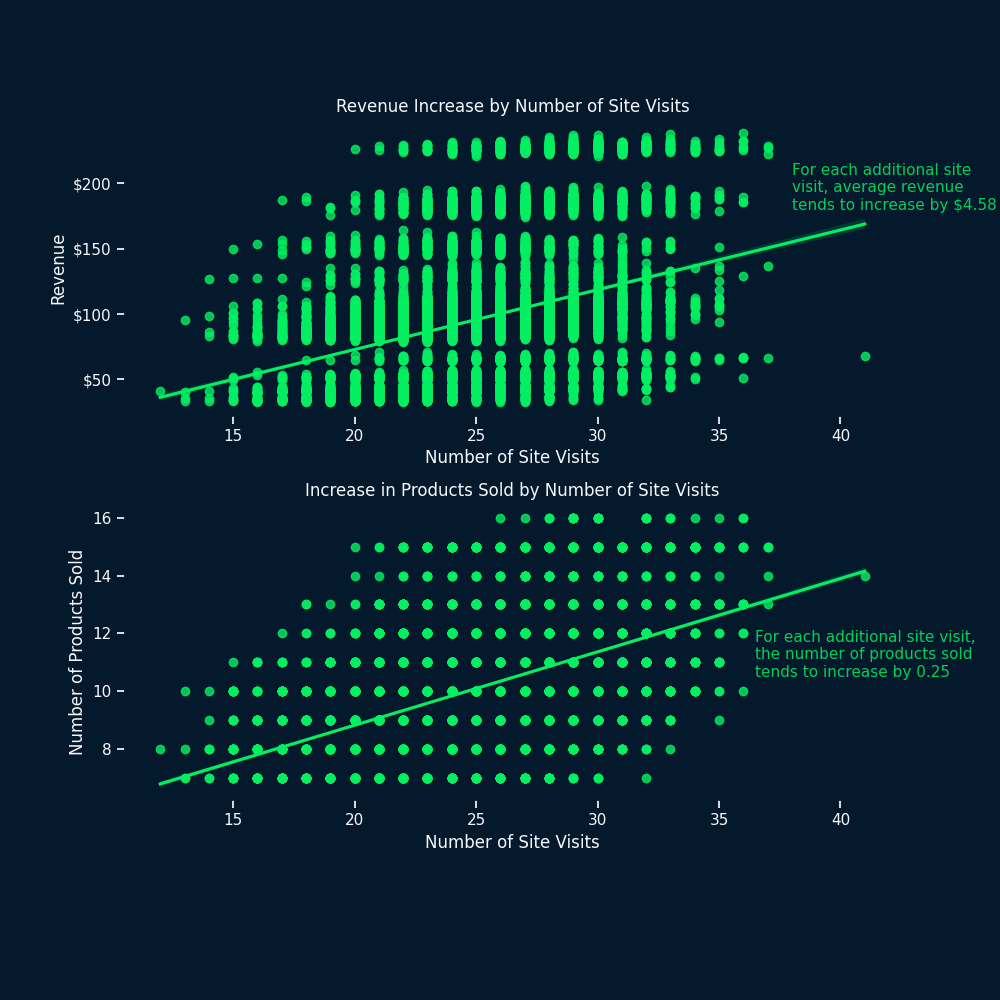

### Estimation of Site Visits Over Time

![Estimation of Site Visits Over Time](Estimation%20of%20Site%20Visits%20Over%20Time.png)

Now that we have defined a metric for the business to monitor, it is important to estimate reference values that would indicate good or poor performance. Right now, 6 weeks after the launch of the new line of products, the average number of site visits per customer is around 28. As time progresses, though, we should expect an increase in this value. If we project the relationship between week an number of site visits, we should have 35 site visits on average at the end of the next month, when the sales manager will report to the executive team. Nevertheless, as we are suggesting the abandonment of an ineffective method, we should have even higher numbers of site visits on average.

## Final Summary

After analysing sales data of a new line of products that has been launched 6 weeks ago, this report has shown that the email+call sales method is the most efficient one and therefore recommends its ample adoption. Since there is a limit to the number of calls the sales team can make, we highlight that just sending an email is also a viable an relatively effective method, specially when we consider how little effort it requires. Data on customer satisfaction could be collected in order for us to understand why a method performs better than the others. Nevertheless, the fact remains that the two methods are the most efficient ones in increasing revenue, site traffic and number of products sold, and that just calling the clients should be promptly abandoned.

We have also established that the most important metric for the sales department to monitor going forward is the average number of site visits per client, since it has a direct relationship with revenue. By projecting the relationship between weeks since launch and average number of site visits, we have that, at the end of the next month (4 weeks from now), we should have no less than 35 site visits on average per customer.